<a href="https://colab.research.google.com/github/ShubhamJadhav03/AIML/blob/main/OutlierRemoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv("/content/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [29]:
df.shape

(13200, 7)

In [42]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [43]:
df2 = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]

In [44]:
df2.shape

(13172, 7)

In [33]:
df.shape[0] - df2.shape[0]

28

On step(2) dataframe, use 4 standard deviation to remove outliers

In [47]:
max_lim = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_lim  = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
min_lim, max_lim

(-9900.429065502549, 23227.73653589429)

In [49]:
df2[(df2.price_per_sqft > max_lim) | (df2.price_per_sqft < min_lim)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [50]:
df3 = df2[(df2.price_per_sqft < max_lim) & (df2.price_per_sqft > min_lim)]
df3.shape

(13047, 7)

Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

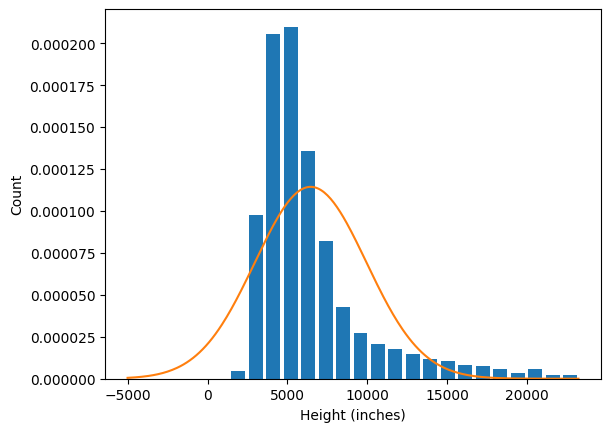

In [58]:

from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [51]:

df2.shape[0]-df3.shape[0]

125

Now using Z score

In [59]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-59-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8829,Raja Rajeshwari Nagar,3 BHK,1608.0,3.0,54.51,3,3389,-0.790784
6282,8th Phase JP Nagar,2 BHK,909.0,2.0,40.90,2,4499,-0.522734
6546,Kundalahalli,2 BHK,1047.0,2.0,91.00,2,8691,0.489576
7478,Whitefield,3 Bedroom,1808.0,4.0,80.00,3,4424,-0.540846
3974,Green Glen Layout,2 BHK,1075.0,2.0,60.00,2,5581,-0.261446
4259,Channasandra,2 BHK,1115.0,2.0,40.00,2,3587,-0.742970
1416,KR Puram,3 BHK,1455.0,3.0,46.00,3,3161,-0.845843
2198,other,2 BHK,1316.0,2.0,55.50,2,4217,-0.590833
1190,other,3 Bedroom,1500.0,3.0,100.00,3,6666,0.000567
1722,Prithvi Layout,4 Bedroom,2028.0,4.0,162.00,4,7988,0.319812


In [60]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [61]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [62]:
df2.shape[0] - df4.shape[0]

125